<div class="alert alert-info">

# PSY 3019 / 6973
# Cueillette et traitement des données en neurosciences cognitives.
## Chapitre 8: Visualisation et stats
### Seaborn: histogrammes, courbes 2/3D, nuages de points

<div class="alert alert-info">
<h3>Seaborn</h3>
</div>

In [1]:
# Seaborn est une bibliothèque Python basées sur Matplotlib
# Seaborn est spécifiquement conçu pour fonctionner avec pandas

import seaborn
import pandas
import numpy
import matplotlib.pyplot as plt
print(f'seaborn version is: {seaborn.__version__}')
print(f'pandas version is: {pandas.__version__}')

seaborn version is: 0.13.1
pandas version is: 1.5.0


In [2]:
rng = numpy.random.RandomState(0)
x = numpy.linspace(0, 10, 500)
y = numpy.cumsum(rng.randn(500,6), 0)

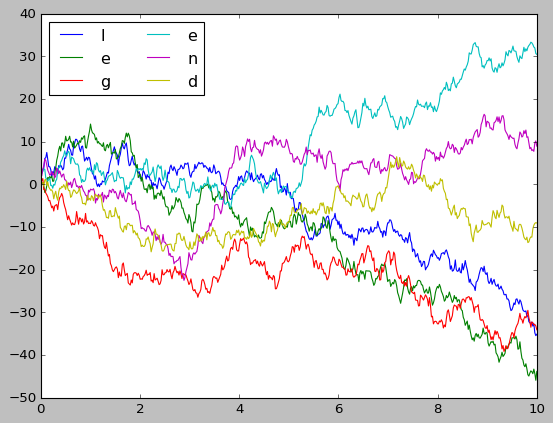

In [3]:
# style Matplotlib:
plt.style.use('classic')

plt.plot(x, y)
plt.legend('legend', ncol=2, loc='upper left')

C:\Users\delha\AppData\Local\Temp\ipykernel_9860\3003777212.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


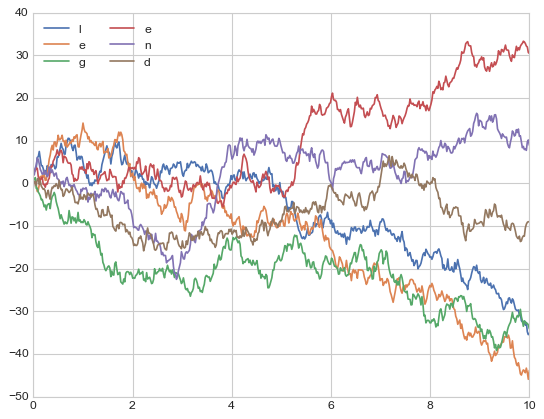

In [4]:
# style Seaborn
seaborn.set()
plt.style.use('seaborn-whitegrid')

plt.plot(x,y)
plt.legend('legend',
           ncol=2,
           loc='upper left')

<div class="alert alert-warning">
<h3>Statistical graphics. seaborn.FACETGRID()</h3>
</div>

FacetGrid is a multiplot grid for conditional relationships.
Oftentimes it is easier to use other plots: relplot, catplot

FacetGrid() can be challenging.
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [5]:
tips = seaborn.load_dataset('tips')
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

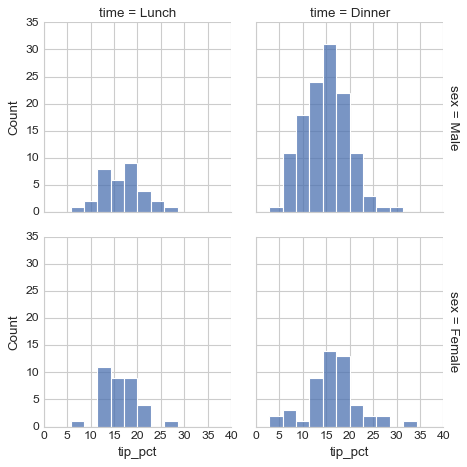

In [6]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

fig = seaborn.FacetGrid(tips, row='sex', col='time', margin_titles=True)

# # avec plt.hist
#fig.map(plt.hist, 'tip_pct', bins=numpy.linspace(0, 40, 15))

#avec sns.histplot
fig.map(seaborn.histplot, 'tip_pct', bins=numpy.linspace(0, 40, 15))

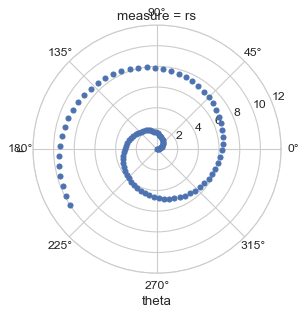

In [7]:
# exemple pour le graphiques polaires (polar plot)

r  = numpy.linspace(0, 10, num=100)
df = pandas.DataFrame({'r': r, 'rs': r})
df = pandas.melt(df, id_vars=['r'], var_name='measure', value_name='theta')

g = seaborn.FacetGrid(df, col="measure", hue="measure",
              subplot_kws=dict(projection='polar'), height=4,
              sharex=False, sharey=False, despine=False)

g.map(plt.scatter, "theta", "r")

<div class="alert alert-warning">
<h3>Histogrammes. seaborn.DISPLOT()</h3>
</div>

seaborn.DISPLOT() draw distribution plot onto a FacetGrid
https://seaborn.pydata.org/generated/seaborn.displot.html

sub-exemples of DISPLOT (can be used independently, or with displot(kind = ):
histplot (with kind = 'hist')
kdeplot  (with kind = 'kde')
ecdfplot (with kind = 'ecdf')

https://seaborn.pydata.org/generated/seaborn.histplot.html
https://seaborn.pydata.org/generated/seaborn.kdeplot.html
https://seaborn.pydata.org/generated/seaborn.ecdfplot.html

KDE = Kernel Density Estimation
ECDF = Empirical Cumulative Distribution Function

compared to seaborn.HISTPLOT(), KDEPLOT can produce a plot that is less cluttered and more interpretable
especially when drawing multiple distributions.

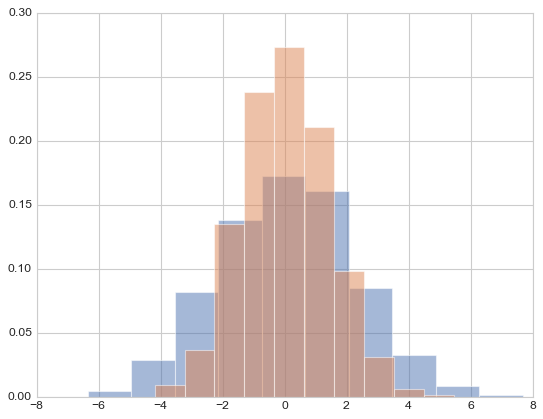

In [8]:
# Seaborn a l'avantage dans l'analyse statistique:

columns = ['x','y']
data = numpy.random.multivariate_normal([0,0], [[5,2], [2,2]], size=2000)
data = pandas.DataFrame(data, columns=columns)

for col in columns:
    plt.hist(data[col], density=True, alpha=0.5)

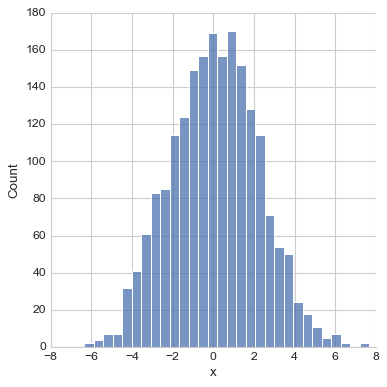

In [9]:
# le paramètre 'data' - peut être définies, ou non

col = 'x'
#sns.histplot(data[col])
#sns.histplot(data = data, x = col)

seaborn.displot(data = data, x = col, kind = 'hist')

<AxesSubplot: xlabel='Count', ylabel='x'>

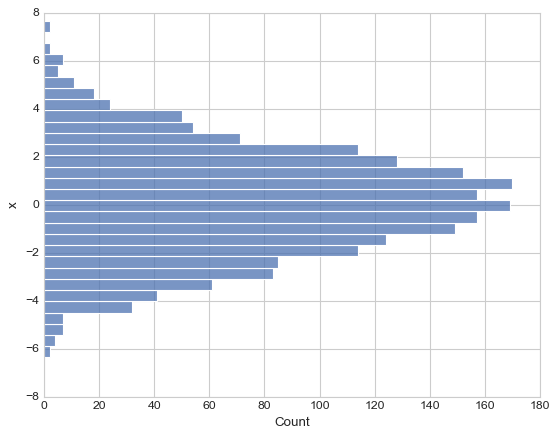

In [10]:
# seaborn permet de changer rapidement l'axe de visualisation

seaborn.histplot(data = data, y = 'x')
#sns.displot(data = data, y = col, kind = 'hist')

<AxesSubplot: xlabel='x', ylabel='Count'>

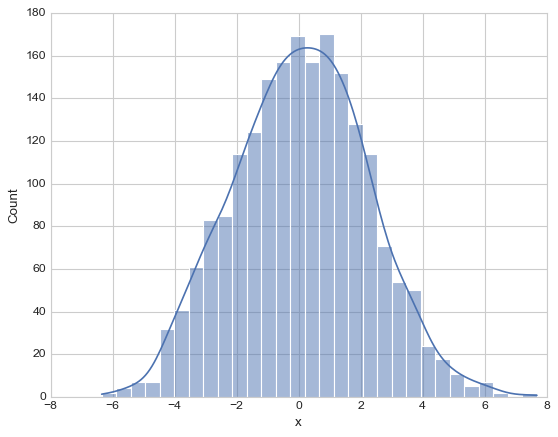

In [11]:
# add a kernel density estimate (kde) to smooth the histogram

seaborn.histplot(data = data, x = 'x', kde = True)

<AxesSubplot: xlabel='x', ylabel='Count'>

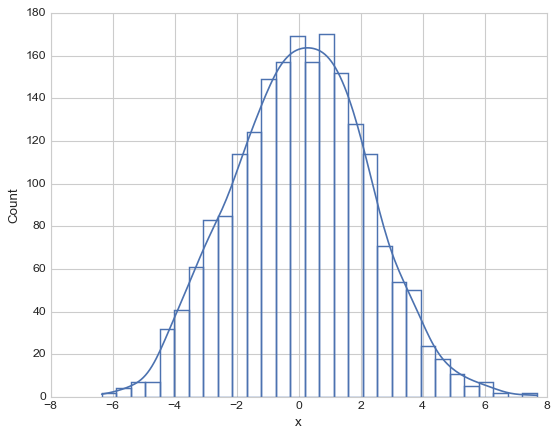

In [12]:
# we can also live the bars unfilled

seaborn.histplot(data = data, x = 'x', kde = True, fill = False)

<AxesSubplot: xlabel='x', ylabel='Count'>

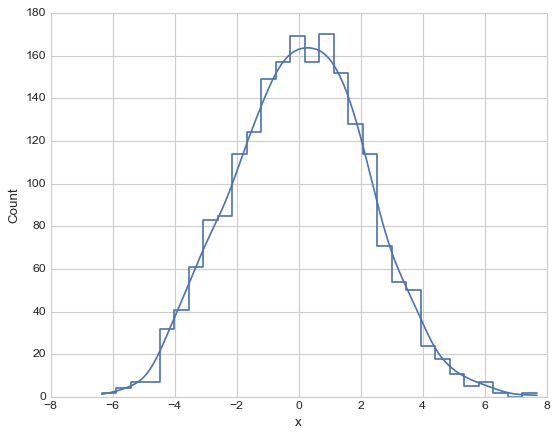

In [13]:
# or view it in stepwise, with: elements = "step"

seaborn.histplot(data = data, x = 'x', kde = True, element = "step", fill = False)

In [14]:
iris = seaborn.load_dataset('iris')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<AxesSubplot: xlabel='sepal_length', ylabel='Count'>

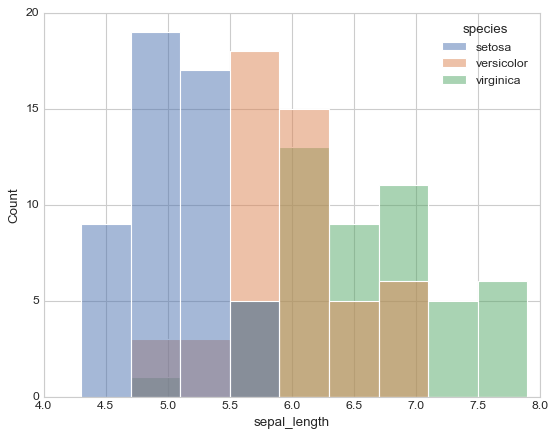

In [15]:
# we can draw multilple histograms from a long-form dataset with hue mapping

seaborn.histplot(data = iris, x = 'sepal_length', hue = "species")

<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>

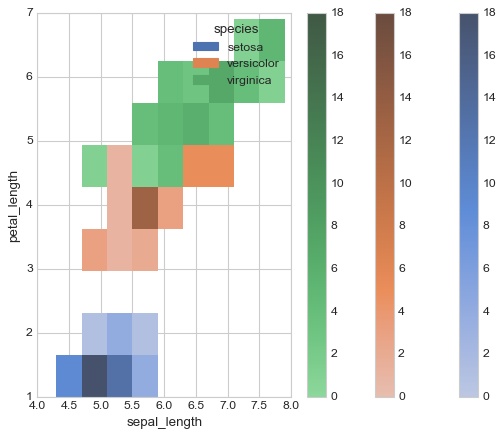

In [29]:
# or view it in stepwise, with: elements = "step"

seaborn.histplot(data = iris, x = 'sepal_length',
             y = 'petal_length',
             hue = "species",
             cbar = True)

<AxesSubplot: xlabel='sepal_length', ylabel='Count'>

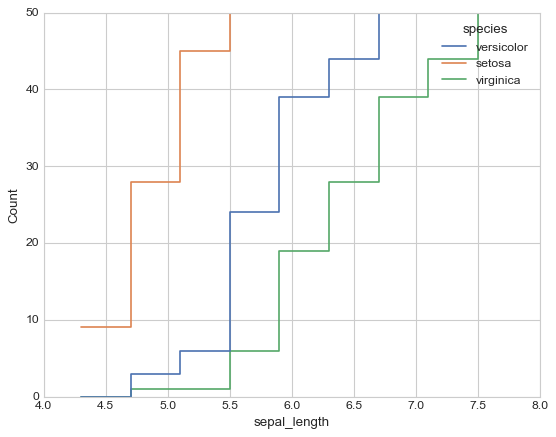

In [23]:
# finally, a cumulative histogram can be drawn:

seaborn.histplot(data = iris, x = 'sepal_length',
             hue = 'species',
             hue_order =['versicolor', 'setosa', 'virginica'],
             element = "step", fill = False,
             cumulative = True)

C:\Users\delha\AppData\Local\Temp\ipykernel_9860\4282392311.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(data[col], shade=True)


<AxesSubplot: xlabel='x', ylabel='Density'>

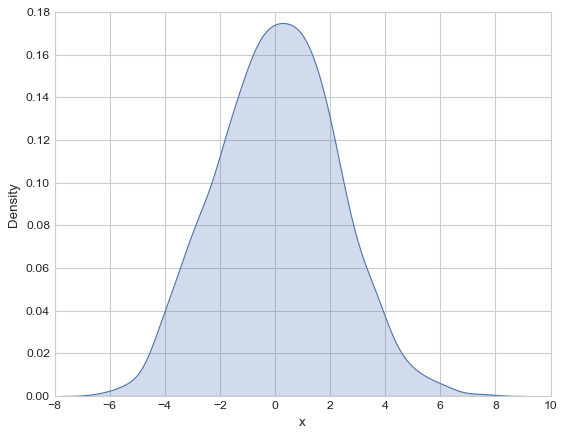

In [24]:
col = 'x' #'y'
seaborn.kdeplot(data[col], shade=True)

C:\Users\delha\AppData\Local\Temp\ipykernel_9860\1323087386.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(data[col], shade=True)
C:\Users\delha\AppData\Local\Temp\ipykernel_9860\1323087386.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  seaborn.kdeplot(data[col], shade=True)


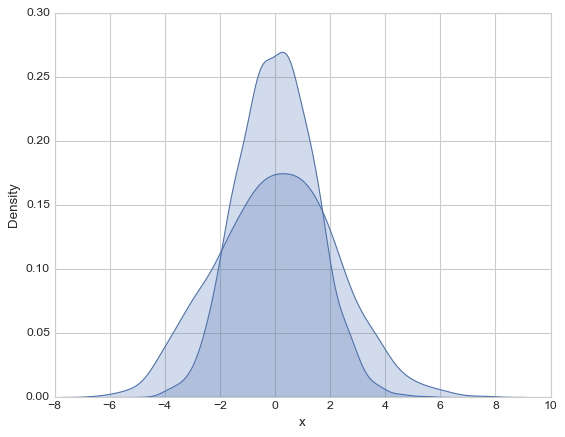

In [25]:
for col in columns:
    seaborn.kdeplot(data[col], shade=True)

<AxesSubplot: ylabel='Density'>

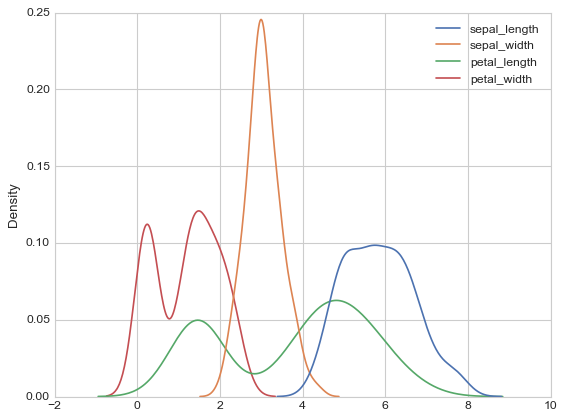

In [26]:
seaborn.kdeplot(data = iris)

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

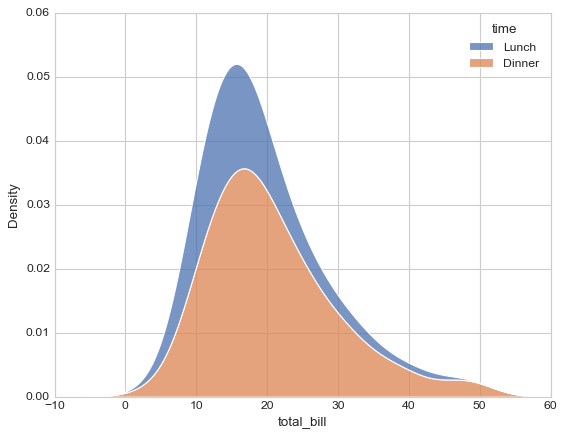

In [27]:
seaborn.kdeplot(data = tips,
            x = 'total_bill',
            hue = 'time',
            multiple = "stack")

<div class="alert alert-warning">
<h3>Categorical plots. seaborn.CATPLOT()</h3>
</div>

catplot() for categorical plots
https://seaborn.pydata.org/generated/seaborn.catplot.html

sub-exemples of CATPLOT (can be used independently, or with catplot(kind = ):
stripplot  (with kind = 'strip')
swarmplot  (with kind = 'swarm')
boxplot    (with kind = 'box')
violinplot (with kind = 'violin')
boxenplot  (with kind = 'boxen')
pointplot  (with kind = 'point')
barplot    (with kind = 'bar')
countplot  (with kind = 'count')

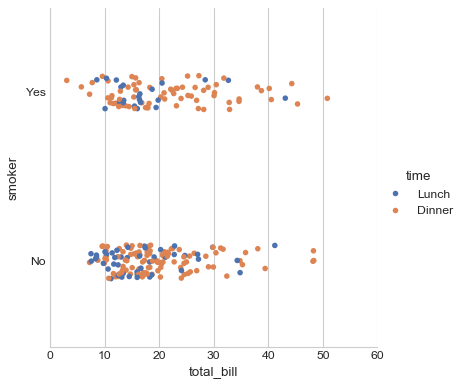

In [28]:
fig = seaborn.catplot(data = tips,
                  x = 'total_bill',
                  y = 'smoker',
                  hue = 'time')

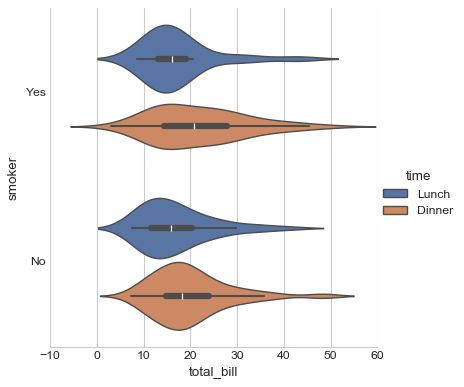

In [30]:
#sns.violinplot(data = iris, x = 'sepal_length', y = 'species', 
#              pallette=['lighblue','lighpink'])

seaborn.catplot(data = tips, x = 'total_bill',
            y = 'smoker', hue = 'time', kind = "violin")

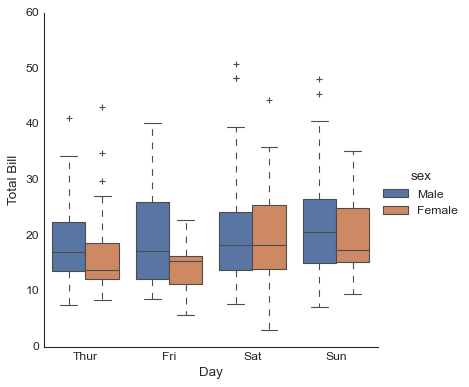

In [32]:
with seaborn.axes_style(style='ticks'):
    g = seaborn.catplot(data=tips, x = 'day',
                    y = 'total_bill', hue = 'sex',
                    kind='box')
    g.set_axis_labels('Day', 'Total Bill')

In [35]:
planets = seaborn.load_dataset('planets')
planets.to_csv("planets.csv")

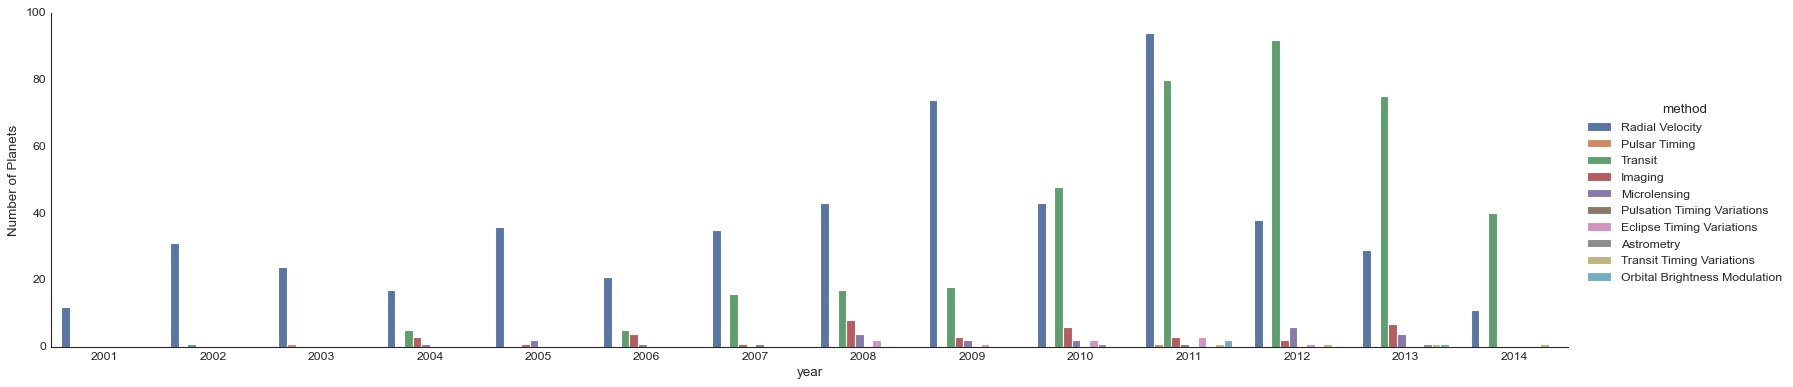

In [36]:

with seaborn.axes_style('white'):
    g = seaborn.catplot(data=planets, x = 'year',
                    aspect=4.0, kind='count',
                      hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets')

<div class="alert alert-warning">
<h3>Relational plots. seaborn.RELPLOT()</h3>
</div>

RELPLOT show the relationship between 2 variables.
https://seaborn.pydata.org/generated/seaborn.relplot.html

sub-exemples of RELPLOT (can be used independently, or with relplot(kind = ):
scatterplot (with kind = 'scatter')
lineplot    (with kind = 'line')

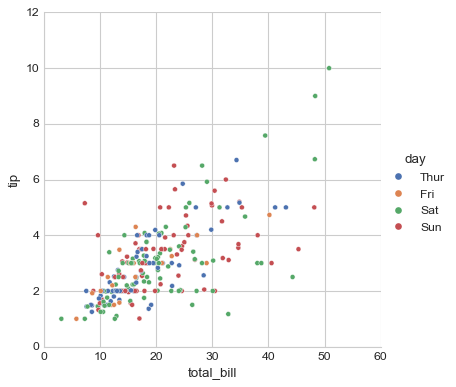

In [37]:
seaborn.relplot(data=tips, x="total_bill",
            y="tip", hue="day")

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

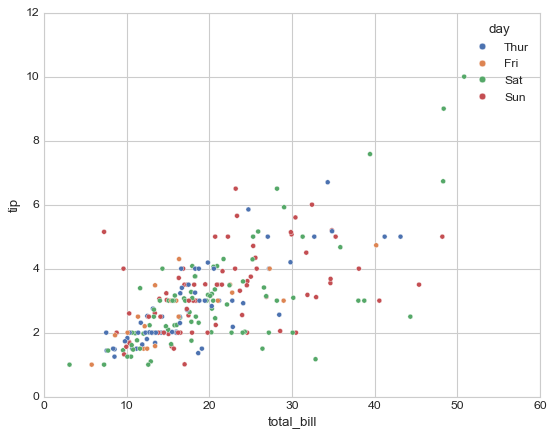

In [38]:
seaborn.scatterplot(data=tips, x="total_bill",
                y="tip", hue="day")

In [39]:
fmri = seaborn.load_dataset("fmri")
fmri.columns

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

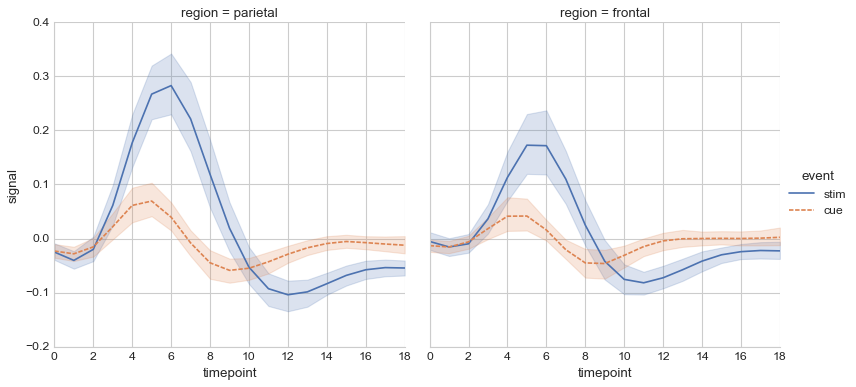

In [40]:
seaborn.relplot(
    data=fmri, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line")

<div class="alert alert-warning">
<h3>Regresion plots. seaborn.REGPLOT(); seaborn.LMPLOT()</h3>
</div>

REGPLOT shows data for a linear regression model fit
https://seaborn.pydata.org/generated/seaborn.regplot.html

LMPLOT combines regplot and FacetGrid
LMPLOT intends to be a convenient interface for regression models
https://seaborn.pydata.org/generated/seaborn.lmplot.html

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

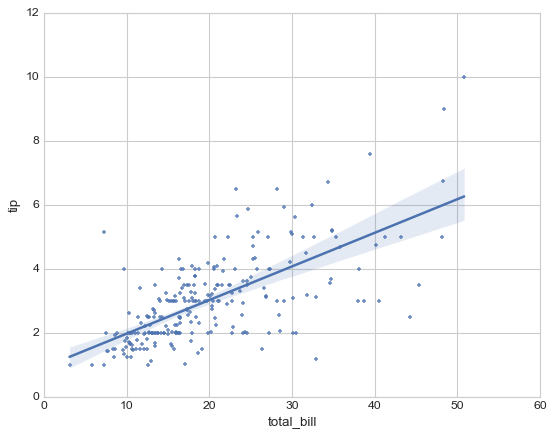

In [41]:
seaborn.regplot(data = tips, x = "total_bill", y = "tip", marker = "+")
#sns.regplot(data = titanic, x = "class", y = "age", marker = "*")

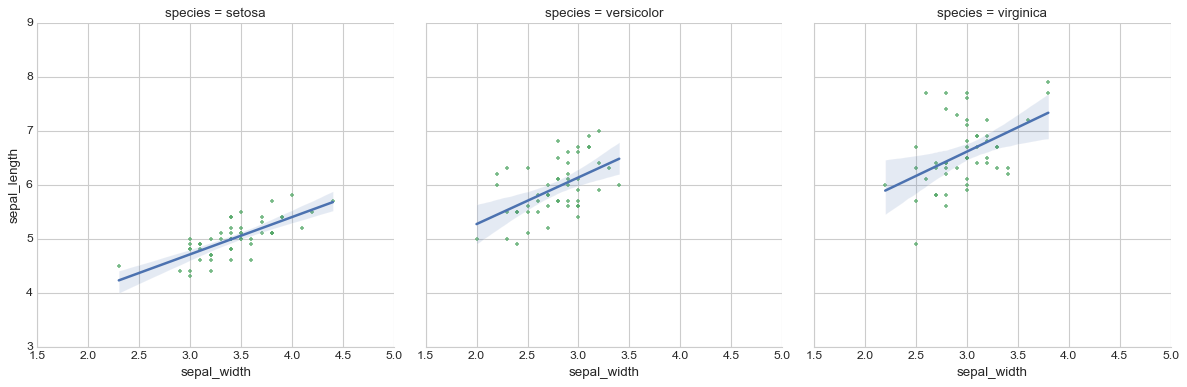

In [42]:
g = seaborn.lmplot(data=iris, x = 'sepal_width', y = 'sepal_length', col='species',
               markers='+', scatter_kws=dict(color='g'))

<div class="alert alert-warning">
<h3>Marginal distributions. Same plot. seaborn.RUGPLOT()</h3>
</div>

plot marginal distributions - ticks on the x / y axes
is used to complement other plots
shows the location of individual observations

https://seaborn.pydata.org/generated/seaborn.rugplot.html

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

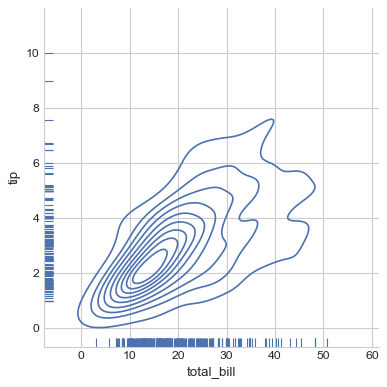

In [43]:
seaborn.displot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde')

seaborn.rugplot(data = tips, x = 'total_bill', y = 'tip')

<div class="alert alert-warning">
<h3>Marginal distributions. Multiple plots. seaborn.JOINTGRID(); seaborn.JOINTPLOT()</h3>
</div>

Draw a plot of two variables with bivariate and univariate graphs.
JOINTGRID uses a grid of subplots and stores data internally for easy plotting

https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid

seaborn.jointgrid(x=None, y=None, data=None, height=6, ratio=5, space=0.2,
                   dropna=False, xlim=None, ylim=None, size=None, marginal_ticks=False, 
                hue=None, palette=None, hue_order=None, hue_norm=None)

JOINTPLOT function is intended to be easier compared JointGrid

https://seaborn.pydata.org/generated/seaborn.jointplot.html

seaborn.jointplot(*, x=None, y=None, data=None, kind='scatter', color=None,
                  height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None,
                  marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None,
                  palette=None, hue_order=None, hue_norm=None, **kwargs)

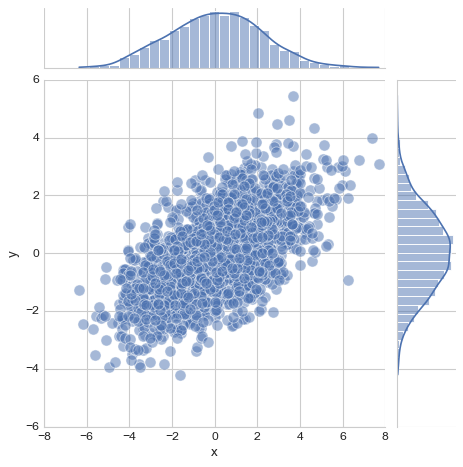

In [45]:
fig = seaborn.JointGrid(data = data, x = 'x', y = 'y')

fig.plot_joint(seaborn.scatterplot, s=100, alpha = 0.5)
fig.plot_marginals(seaborn.histplot, kde = True)

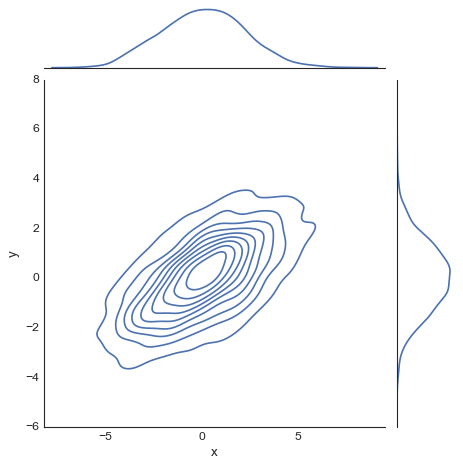

In [57]:
with seaborn.axes_style('white'):
    seaborn.jointplot(data = data, x = 'x',
                  y = 'y', kind='kde') # other kind: 'hex'

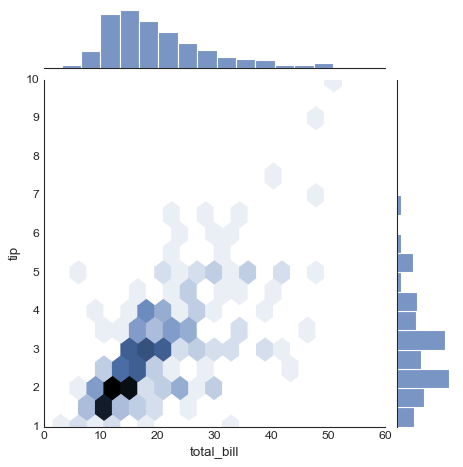

In [47]:
with seaborn.axes_style('white'):
    seaborn.jointplot(data=tips, x = 'total_bill',
                  y = 'tip', kind='hex')

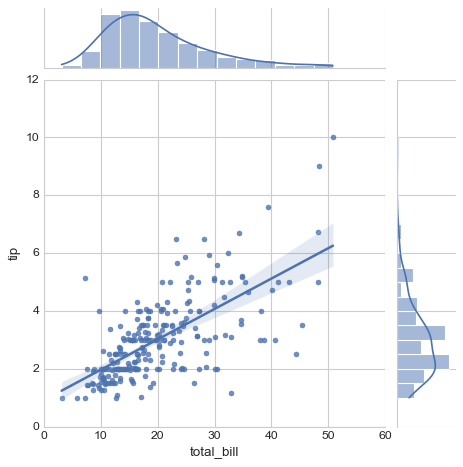

In [48]:
seaborn.jointplot(data=tips, x = 'total_bill',
              y = 'tip', kind='reg')

<div class="alert alert-warning">
<h3>Subplots relationships. seaborn.PAIRGRID(); seaborn.PAIRPLOT()</h3>
</div>

PAIRGRID / PAIRPLOT shows pairwise relatioships in a dataset. 
They show each variable in a dataset onto a column and row in a grid of multiple axes


PAIRPLOT is an easier method of PAIRGRID, but pairgrid gives more flexibility

https://seaborn.pydata.org/generated/seaborn.PairGrid.html
seaborn.pairgrid(data, *, hue=None, hue_order=None, palette=None, hue_kws=None, 
                 vars=None, x_vars=None, y_vars=None, corner=False, diag_sharey=True, 
                 height=2.5, aspect=1, layout_pad=0.5, despine=True, dropna=False, size=None)¶
   
https://seaborn.pydata.org/generated/seaborn.pairplot.html
seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None,
                 x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', 
                 arkers=None, height=2.5, aspect=1, corner=False, dropna=False,
                 plot_kws=None, diag_kws=None, grid_kws=None, size=None)¶

In [52]:
planets = seaborn.load_dataset('planets')
planets.columns

import seaborn as sns

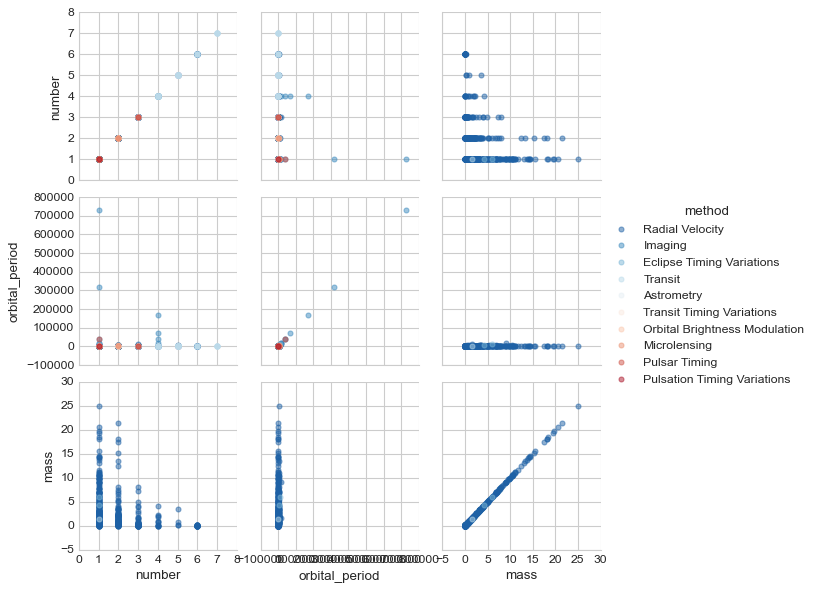

In [53]:
fig = seaborn.PairGrid(data = planets, vars=['number','orbital_period', 'mass'],
                      hue='method', palette='RdBu_r')
fig.map(plt.scatter, alpha=0.5) # Attention - ici la version pyplot.scatter et utilisé
fig.add_legend()

c:\Users\delha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\delha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\delha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\delha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\delha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, 

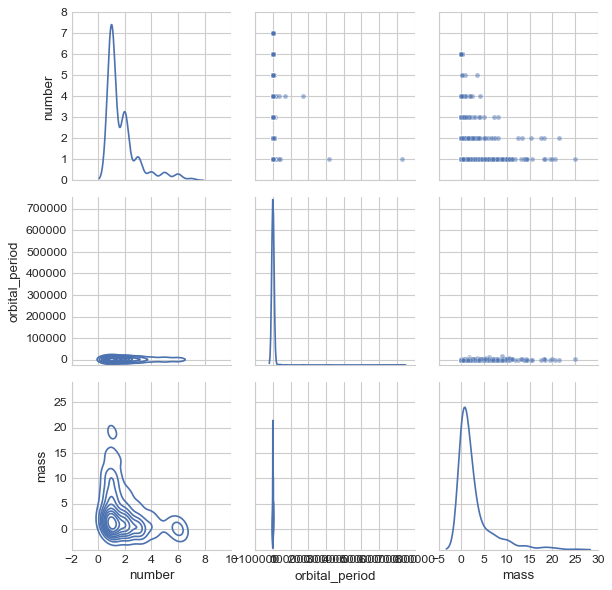

In [54]:
fig = seaborn.PairGrid(planets, vars=['number','orbital_period', 'mass'],
                 diag_sharey = False, palette='RdBu_r')
fig.map_upper(sns.scatterplot, alpha=0.5)
fig.map_lower(sns.kdeplot)
fig.map_diag(sns.kdeplot)

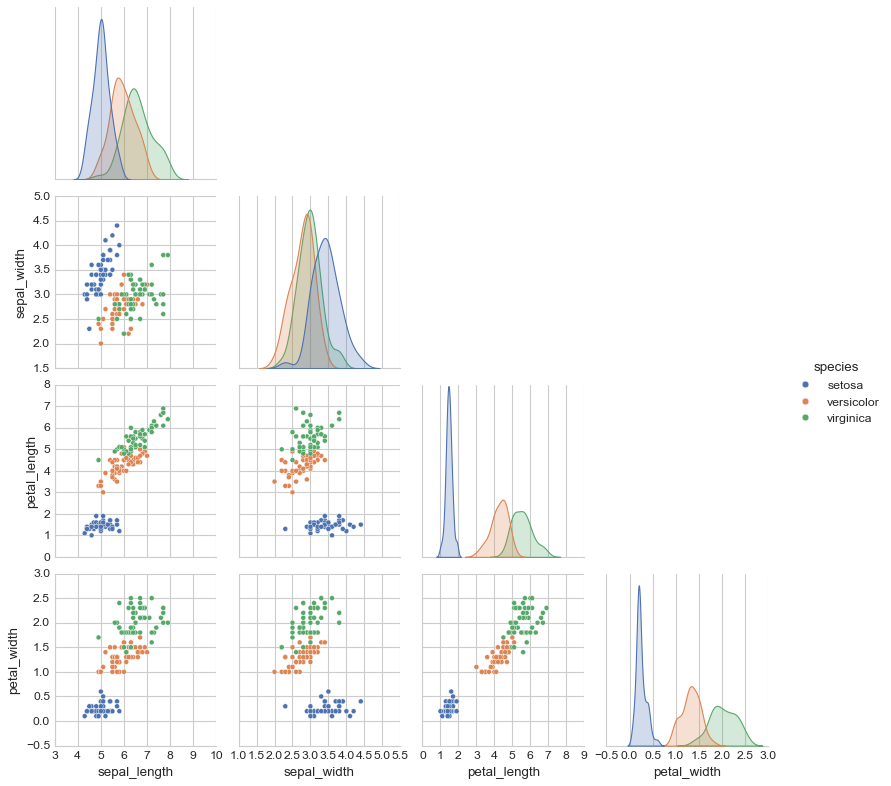

In [55]:
seaborn.pairplot(iris, hue='species', corner = True)

<div class="alert alert-danger">
<b>les commandes et codes à apprendre par cœur </b></div>

In [ ]:
SEABORN:
    plt.style.use('classic') #'seaborn-whitegrid'
    seaborn.displot()
        seaborn.histplot()
        seaborn.kdeplot(x, shade=True)
    seaborn.catplot()
        seaborn.boxplot()
        seaborn.violinplot()
        seaborn.barplot()
        seaborn.countplot()
    seaborn.relplot()
        seaborn.scatterplot()
        seaborn.lineplot()
    seaborn.regplot()
    seaborn.lmplot()
    seaborn.rugplot()
    seaborn.jointplot()
    seaborn.pairplot()
    
PANDAS
    pandas.melt # !!! d'ou vient la collone "measure" et "theta"

In [63]:
import os
import seaborn as sns
import pandas as pd
import numpy as np

In [75]:
file = 'HugoDelhaye_psy6973_data_20240116.csv'
path = os.path.join(os.environ['USERPROFILE'], 'Desktop', 'PSY3019', file)

print(os.path.exists(path))

df = pd.read_csv(path).replace('.', np.nan)



True


In [90]:
print(df.keys())
df

Index(['PATNO', 'age', 'sex', 'EDUCYRS', 'duration', 'ageonset', 'agediag',
       'rigidity', 'tremor', 'upsit', 'gds', 'hvlt_retention', 'quip', 'scopa',
       'stai', 'moca', 'r_striatum', 'l_striatum'],
      dtype='object')


,PATNO,age,sex,EDUCYRS,duration,ageonset,agediag,rigidity,tremor,upsit,gds,hvlt_retention,quip,scopa,stai,moca,r_striatum,l_striatum
0,3000,69.1397,2,18,NaN,NaN,NaN,0,0,35,1,0.90909,0,5,55,27,5.93,6.06
1,3001,65.1425,1,16,10.5333,63.5918,64.2603,2,2,25,1,1.20000,1,12,51,29,2.8,2.57
2,3002,67.5781,2,16,12.9,65.5205,66.5041,0,1,17,3,0.91667,1,22,69,29,3.93,5.5
3,3003,56.7178,2,16,24.6,51.8274,54.6685,7,3,23,1,0.91667,0,16,51,25,4.74,3.22
4,3004,59.4137,1,16,NaN,NaN,NaN,0,0,36,0,0.62500,0,6,51,29,8.63,8.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,4127,67.0932,1,14,1.1333,66.5077,66.9973,10,5,30,1,1.00000,0,8,59,27,5.14,4.61
879,4135,66.8329,1,14,14.4667,64.6712,65.6329,2,2,34,6,1.16667,0,9,68,24,4.3,4.04
880,4136,55.7644,1,13,17.6,54.2575,54.3014,5,2,35,4,1.00000,2,16,97,25,1.04,0.84
881,4136,55.7644,1,13,17.6,54.2575,54.3014,5,2,35,4,1.00000,2,16,97,25,1.04,0.84


<AxesSubplot: xlabel='stai', ylabel='Count'>

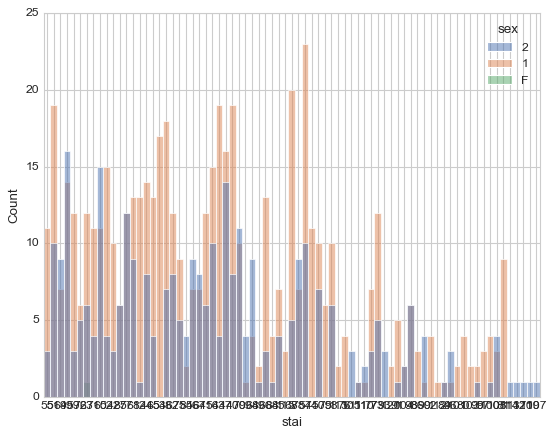

In [96]:
seaborn.histplot(data = df, x = 'stai',
             hue = 'sex')